In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


# Data Preprocessing

In [5]:
for i in [train, test]:
    i['max_power'].replace(to_replace='0', value=None, inplace=True)

In [6]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

<AxesSubplot:title={'center':'selling_price'}, xlabel='owner'>

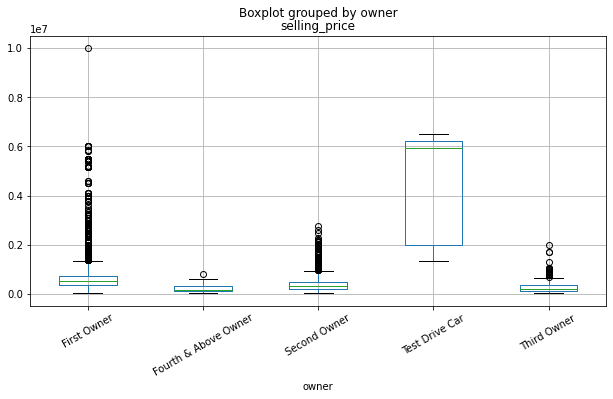

In [7]:
train.boxplot(column='selling_price', by='owner', figsize=(10,5), rot=30)

In [8]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=-1, inplace=True)

<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

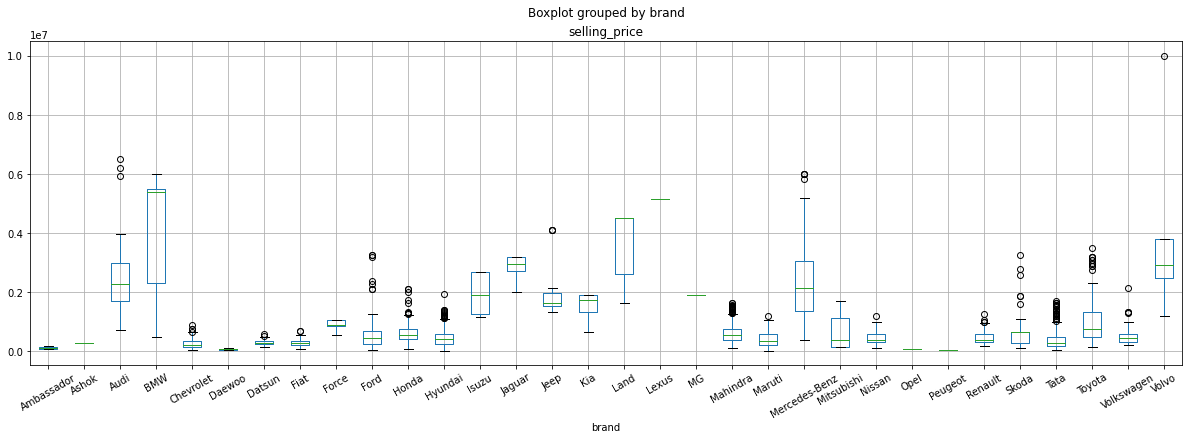

In [9]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [10]:
for i in [train, test]:
    i['brand_price'] = i['brand'].copy()
    for j in i.brand.unique():
        i['brand_price'].replace(to_replace=j, value = train[train.brand == j].selling_price.mean()/100000, inplace=True)

In [11]:
for i in [train, test]:
    for j in ['n_mileage', 'n_engine', 'n_max_power', 'torque_nm', 'seats']:
        for k in i[i[j].isna()].index:
            i.at[k, j] = train[train.brand == i.loc[k].brand][j].mean()

In [12]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

<AxesSubplot:>

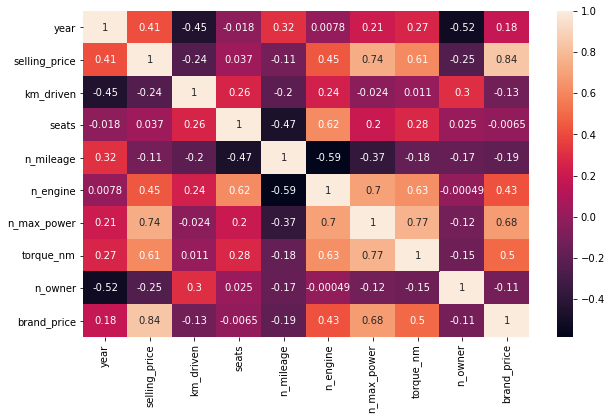

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

In [14]:
train = pd.concat([train, pd.get_dummies(train.fuel, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.transmission, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.seller_type, drop_first=True)], axis=1)

test = pd.concat([test, pd.get_dummies(test.fuel, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.transmission, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.seller_type, drop_first=True)], axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6000 non-null   object 
 1   year              6000 non-null   int64  
 2   selling_price     6000 non-null   int64  
 3   km_driven         6000 non-null   int64  
 4   fuel              6000 non-null   object 
 5   seller_type       6000 non-null   object 
 6   transmission      6000 non-null   object 
 7   owner             6000 non-null   object 
 8   mileage           5841 non-null   object 
 9   engine            5841 non-null   object 
 10  max_power         5846 non-null   object 
 11  torque            5840 non-null   object 
 12  seats             6000 non-null   float64
 13  brand             6000 non-null   object 
 14  brand_extend      6000 non-null   object 
 15  n_mileage         6000 non-null   float64
 16  n_engine          6000 non-null   float64


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                2128 non-null   int64  
 1   name              2128 non-null   object 
 2   year              2128 non-null   int64  
 3   km_driven         2128 non-null   int64  
 4   fuel              2128 non-null   object 
 5   seller_type       2128 non-null   object 
 6   transmission      2128 non-null   object 
 7   owner             2128 non-null   object 
 8   mileage           2066 non-null   object 
 9   engine            2066 non-null   object 
 10  max_power         2067 non-null   object 
 11  torque            2066 non-null   object 
 12  seats             2128 non-null   float64
 13  brand             2128 non-null   object 
 14  brand_extend      2128 non-null   object 
 15  n_mileage         2128 non-null   float64
 16  n_engine          2128 non-null   float64


# Build model

In [17]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,108.50,260.00,1,3.689275,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,88.76,219.66,1,4.542093,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,168.50,360.00,2,9.519480,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,121.30,154.90,1,4.542093,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,190.00,400.00,1,32.175000,1,0,0,0,1,0


In [18]:
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,103.50,153.0,1,6.358441,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,117.30,145.0,1,5.956358,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,82.00,114.0,1,4.542093,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,120.00,290.0,1,6.177663,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,98.96,215.0,1,5.212743,1,0,0,1,0,0


In [19]:
x = train.drop(['name','fuel','selling_price','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend'], axis=1)
y = train['selling_price']

In [20]:
x.head()

,year,km_driven,seats,n_mileage,n_engine,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2018,9500,5.0,21.50,1497.0,108.50,260.00,1,3.689275,1,0,0,1,1,0
1,2018,30000,5.0,21.19,1396.0,88.76,219.66,1,4.542093,1,0,0,1,1,0
2,2015,80000,7.0,12.55,2982.0,168.50,360.00,2,9.519480,1,0,0,0,1,0
3,2015,35000,5.0,17.01,1591.0,121.30,154.90,1,4.542093,0,0,1,1,1,0
4,2019,20000,5.0,18.00,1969.0,190.00,400.00,1,32.175000,1,0,0,0,1,0


In [21]:
x_test = test.drop(['Id','name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend'], axis=1)

In [22]:
x_test.head()

,year,km_driven,seats,n_mileage,n_engine,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2016,11000,5.0,14.30,1598.0,103.50,153.0,1,6.358441,0,0,1,0,0,0
1,2017,35000,5.0,17.80,1497.0,117.30,145.0,1,5.956358,0,0,1,1,1,0
2,2014,80000,5.0,19.10,1197.0,82.00,114.0,1,4.542093,0,0,1,1,1,0
3,2014,145241,7.0,12.05,2179.0,120.00,290.0,1,6.177663,1,0,0,1,1,0
4,2015,92651,5.0,21.70,1498.0,98.96,215.0,1,5.212743,1,0,0,1,0,0


from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.01,random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import metrics

In [24]:
result3 = pd.DataFrame(columns=['max_depth','n_es', 'Train_RMSE', 'Train_R^2'])

for i in range(12,17):
    for j in range(30,40):
        extra_tree = ExtraTreesRegressor(random_state=48, max_depth=i, n_estimators=j)
        extra_tree.fit(x,y)

        train_pred = extra_tree.predict(x)

        train_rmse = np.sqrt(metrics.mean_squared_error(y, train_pred))
        train_r2 = metrics.r2_score(y, train_pred)

        result3 = result3.append(pd.Series({'max_depth': i,'n_es': j, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2}), ignore_index=True)

result3.sort_values(by='Train_RMSE')

,max_depth,n_es,Train_RMSE,Train_R^2
40,16.0,30.0,37055.720442,0.997889
42,16.0,32.0,37157.746929,0.997878
43,16.0,33.0,37391.889733,0.997851
41,16.0,31.0,37421.391027,0.997848
46,16.0,36.0,37423.390915,0.997847
45,16.0,35.0,37454.664871,0.997844
44,16.0,34.0,37582.345066,0.997829
47,16.0,37.0,37768.880729,0.997807
48,16.0,38.0,37862.702569,0.997797
49,16.0,39.0,38018.889958,0.997778


In [25]:
extra_tree = ExtraTreesRegressor(random_state=48, max_depth=16, n_estimators=30)
extra_tree.fit(x,y)

ExtraTreesRegressor(max_depth=16, n_estimators=30, random_state=48)

In [26]:
train_pred = extra_tree.predict(x)

In [27]:
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, train_pred)))
print('R^2 :', metrics.r2_score(y, train_pred))

Train set:
RMSE: 37055.72044187507
R^2 : 0.9978894366158427


In [28]:
test_pred = extra_tree.predict(x_test)

In [29]:
submit = sample.copy()

In [30]:
submit.Predicted = test_pred

In [31]:
submit

,Id,Predicted
0,1,6.447777e+05
1,2,8.682632e+05
2,3,4.205039e+05
3,4,5.745989e+05
4,5,5.521024e+05
...,...,...
2123,2124,6.459571e+05
2124,2125,7.226483e+05
2125,2126,1.478707e+05
2126,2127,1.074640e+06


In [32]:
submit.to_csv(path_or_buf= path + 'submit_19_12_2.csv', index=False)